[View in Colaboratory](https://colab.research.google.com/github/FoolishAish/PUBG/blob/master/pubg.ipynb)

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/Lenovo/Downloads/train.csv.zip')
df.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [0]:
df.shape

(4357336, 26)

In [0]:
df.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,...,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,...,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,...,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,...,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


In [0]:
df.dtypes

Id                   int64
groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [0]:
df.isnull().sum(axis=0)

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [0]:
match=df.groupby(['matchId']).count()['kills']
kills=match.sort_values(axis=0,ascending=False)
kills.head(5)

matchId
24256    100
21074    100
46549    100
7315     100
7316     100
Name: kills, dtype: int64

In [0]:
cols_to_drop = ['Id', 'groupId', 'matchId']
cols_to_fit = [col for col in df.columns if col not in cols_to_drop]
corr = df[cols_to_fit].corr()

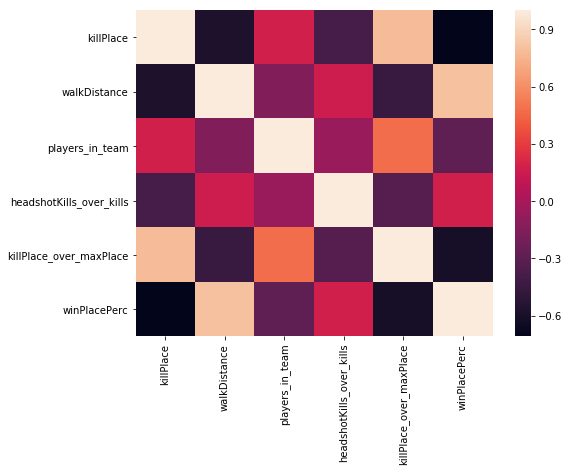

In [0]:
agg = df.groupby(['groupId']).size().to_frame('players_in_team')
df = df.merge(agg, how='left', on=['groupId'])
df['headshotKills_over_kills'] = df['headshotKills'] / df['kills']
df['headshotKills_over_kills'].fillna(0, inplace=True)
df['killPlace_over_maxPlace'] = df['killPlace'] / df['maxPlace']
df['killPlace_over_maxPlace'].fillna(0, inplace=True)
df['killPlace_over_maxPlace'].replace(np.inf, 0, inplace=True)
corr = df[['killPlace', 'walkDistance', 'players_in_team', 'headshotKills_over_kills', 'killPlace_over_maxPlace', 'winPlacePerc']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values)
plt.show()

In [0]:
total_distance=df['total_distance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
total_distance.head(5)

0    1373.70
1     119.60
2    3248.00
3      21.49
4     640.80
dtype: float64

In [0]:
winner=df[(total_distance==0)&(df.winPlacePerc==1)]

In [0]:
winner.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team_x,headshotKills_over_kills,killPlace_over_maxPlace,players_in_team_y,players_in_team,total_distance
1777,1777,344864,1777,6,0,1087.0,13,6,0,1,...,0.0,9,1500,1.0,5,0.500000,0.250000,5,5,0.0
3405,3405,1057673,3405,3,1,1462.0,0,5,6,1,...,0.0,29,1500,1.0,1,0.333333,0.142857,1,1,0.0
4609,4609,1588396,4609,0,0,365.7,4,1,0,9,...,0.0,8,1500,1.0,6,0.250000,1.800000,6,6,0.0
16765,16765,299694,16765,3,0,771.7,6,0,4,11,...,0.0,17,1500,1.0,8,0.000000,1.833333,8,8,0.0
19746,19746,429593,19746,4,1,1011.0,9,4,4,4,...,0.0,16,1500,1.0,4,0.444444,1.333333,4,4,0.0


In [0]:
winner.size

5184